### 1. Importing Libraries

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict,ShuffleSplit,GridSearchCV
from sklearn.preprocessing import scale
from sklearn import model_selection
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
import time
from skompiler import skompile

In [2]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

In [3]:
df_patients = pd.read_csv('diabetes.csv')
df_patients.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df_patients.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### 2. Performing EDA

#### 2.1 Checking for Null values

In [5]:
df_patients.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_patients.drop('Outcome',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)
scaled_features = scaler.transform(df_patients.drop('Outcome',axis=1))

In [7]:
df_final = pd.DataFrame(scaled_features,columns=df_patients.columns[:-1])
df_final.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


#### 2.2 Transforming the skewed values

Skewness: 2.272251
Log Transformation:  -0.6505946023511678
Sqrt Transformation:  0.9123426947459371
Cbrt Transformation:  0.6184554429942055


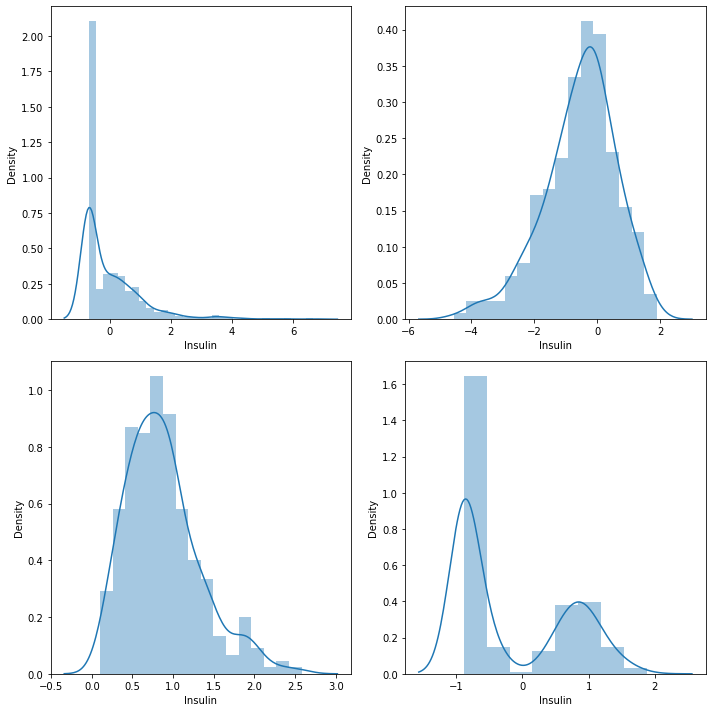

In [9]:
print("Skewness: %f" %df_final['Insulin'].skew())

log_insuline = np.log(df_final['Insulin'])
print('Log Transformation: ',log_insuline.skew())

sqrt_insuline = np.sqrt(df_final['Insulin'])
print('Sqrt Transformation: ',sqrt_insuline.skew())

cbrt_insuline = np.cbrt(df_final['Insulin'])
print('Cbrt Transformation: ',cbrt_insuline.skew())

fig, ax = plt.subplots(2, 2, figsize = (10, 10))
sns.distplot(df_final['Insulin'],ax = ax[0,0])
sns.distplot(log_insuline, ax = ax[0,1])
sns.distplot(sqrt_insuline, ax = ax[1,0])
sns.distplot(cbrt_insuline, ax = ax[1,1])
plt.tight_layout()

Skewness: 1.919911
Log Transformation:  -1.2900117356181484
Sqrt Transformation:  0.8223243883192791
Cbrt Transformation:  0.5500764780049568


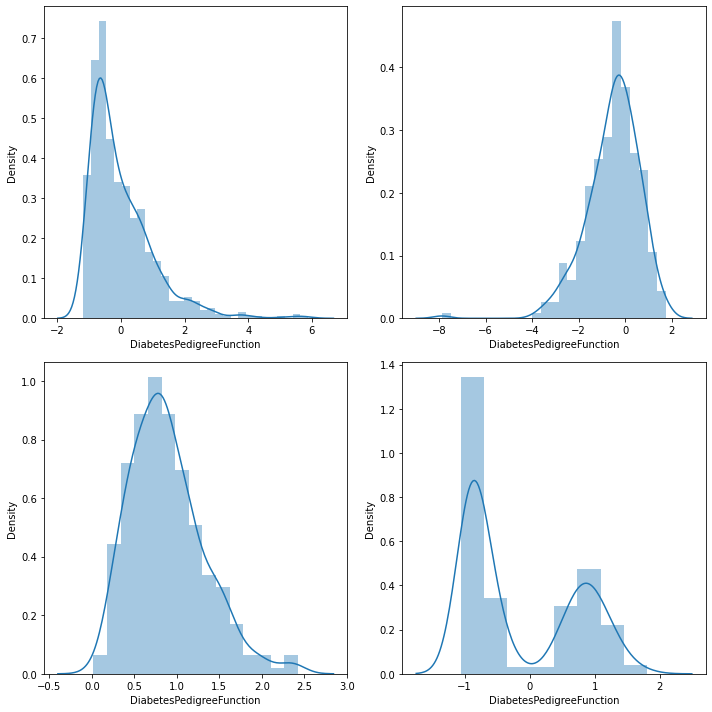

In [10]:
print("Skewness: %f" %df_final['DiabetesPedigreeFunction'].skew())

log_DPF = np.log(df_final['DiabetesPedigreeFunction'])
print('Log Transformation: ',log_DPF.skew())

sqrt_DPF = np.sqrt(df_final['DiabetesPedigreeFunction'])
print('Sqrt Transformation: ',sqrt_DPF.skew())

cbrt_DPF = np.cbrt(df_final['DiabetesPedigreeFunction'])
print('Cbrt Transformation: ',cbrt_DPF.skew())

fig, ax = plt.subplots(2, 2, figsize = (10, 10))
sns.distplot(df_final['DiabetesPedigreeFunction'],ax = ax[0,0])
sns.distplot(log_DPF, ax = ax[0,1])
sns.distplot(sqrt_DPF, ax = ax[1,0])
sns.distplot(cbrt_DPF, ax = ax[1,1])
plt.tight_layout()

Skewness: 1.129597
Log Transformation:  -0.7923535453979876
Sqrt Transformation:  0.22192769048053076
Cbrt Transformation:  0.5169937745011338


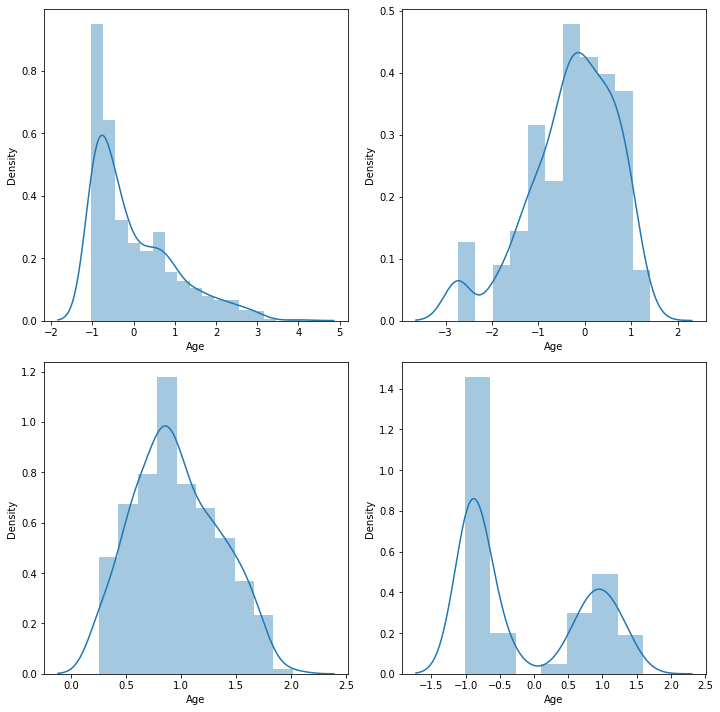

In [11]:
print("Skewness: %f" %df_final['Age'].skew())

log_Age = np.log(df_final['Age'])
print('Log Transformation: ',log_Age.skew())

sqrt_Age = np.sqrt(df_final['Age'])
print('Sqrt Transformation: ',sqrt_Age.skew())

cbrt_Age = np.cbrt(df_final['Age'])
print('Cbrt Transformation: ',cbrt_Age.skew())

fig, ax = plt.subplots(2, 2, figsize = (10, 10))
sns.distplot(df_final['Age'],ax = ax[0,0])
sns.distplot(log_Age, ax = ax[0,1])
sns.distplot(sqrt_Age, ax = ax[1,0])
sns.distplot(cbrt_Age, ax = ax[1,1])
plt.tight_layout()

#### 2.3 Replacing the skewed values with transformed values

In [12]:
df_final['Insulin'] = sqrt_insuline
df_final['DiabetesPedigreeFunction'] = log_DPF
df_final['Age'] = log_Age
df_final.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,NaN,0.204013,-0.758236,0.35487
1,-0.844885,-1.123396,-0.160546,0.530902,NaN,-0.684422,NaN,NaN
2,1.233880,1.943724,-0.263941,-1.288212,NaN,-1.103255,-0.503523,NaN
3,-0.844885,-0.998208,-0.160546,0.154533,0.351143,-0.494043,NaN,NaN
4,-1.141852,0.504055,-1.504687,0.907270,0.875121,1.409746,1.702001,NaN


#### 2.4 Check correlation

Correlation
Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64


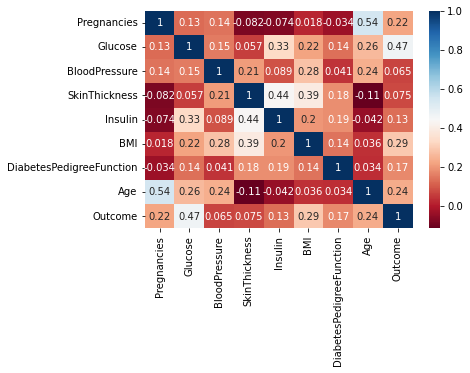

In [13]:
print('Correlation')
print(df_patients.corr()['Outcome'].sort_values(ascending=False))
sns.heatmap(df_patients.corr(), annot=True, cmap="RdBu")
plt.show()

#### Insuline level and Age have a positive coorelation so one of the variabels can be dropped
We are dropping here Insuline

In [14]:
df_patients = df_patients.drop('Age',axis= 1)

### 3. Training Process

In [15]:
X = df_patients.drop("Outcome",axis=1)
y= df_patients["Outcome"] #We will predict Outcome(diabetes) 

In [16]:
X.shape,y.shape

((768, 7), (768,))

In [17]:
X_train = X.iloc[:600]
X_test = X.iloc[600:]
y_train = y[:600]
y_test = y[600:]

print("X_train Shape: ",X_train.shape)
print("X_test Shape: ",X_test.shape)
print("y_train Shape: ",y_train.shape)
print("y_test Shape: ",y_test.shape)

X_train Shape:  (600, 7)
X_test Shape:  (168, 7)
y_train Shape:  (600,)
y_test Shape:  (168,)


In [18]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [19]:
pred = knn.predict(X_test)
pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0])

### 4. Evaluation

In [20]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred))

[[76 32]
 [33 27]]


In [21]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.70      0.70      0.70       108
           1       0.46      0.45      0.45        60

    accuracy                           0.61       168
   macro avg       0.58      0.58      0.58       168
weighted avg       0.61      0.61      0.61       168



### 5. Model Tuning using K-Fold Cross Validation.

In [22]:
accuracies= cross_val_score(estimator=knn,
                            X=X_train,y=y_train,
                            cv=10)
print("Average Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standart Deviation of Accuracies: {:.2f} %".format(accuracies.std()*100))

Average Accuracy: 69.00 %
Standart Deviation of Accuracies: 6.11 %


In [23]:
knn.predict(X_test)[:10]

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0])

In [24]:
results =pd.DataFrame(knn.predict_proba(X_test)[:10],
             columns=["Possibility of 0","Possibility of 1"])

results["Class"]=[1 if i>0.5 else 0 for i in results["Possibility of 1"]]
results

,Possibility of 0,Possibility of 1,Class
0,1.0,0.0,0
1,1.0,0.0,0
2,1.0,0.0,0
3,1.0,0.0,0
4,0.0,1.0,1
5,1.0,0.0,0
6,0.0,1.0,1
7,1.0,0.0,0
8,0.0,1.0,1
9,1.0,0.0,0


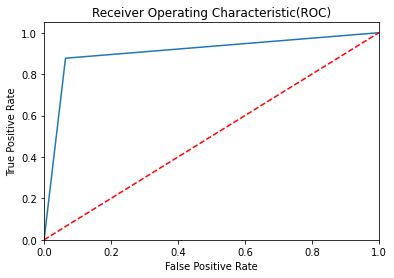

In [25]:
knn_roc = roc_auc_score(y,knn.predict(X))

fp,tp,trshld = roc_curve(y,knn.predict_proba(X)[:,1])
plt.figure()
plt.plot(fp,tp,label="Area Under Curve(AUC)" %knn_roc)
plt.plot([0,1],[0,1],"r--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic(ROC)")
plt.show()

#### Finding the Correct K value

Text(0, 0.5, 'Error Rate')

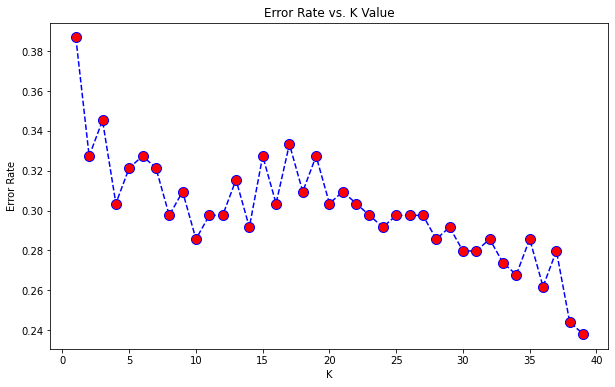

In [26]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')


In [27]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[76 32]
 [33 27]]


              precision    recall  f1-score   support

           0       0.70      0.70      0.70       108
           1       0.46      0.45      0.45        60

    accuracy                           0.61       168
   macro avg       0.58      0.58      0.58       168
weighted avg       0.61      0.61      0.61       168



In [29]:
# NOW WITH K=23
knn = KNeighborsClassifier(n_neighbors=36)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=21')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=21


[[98 10]
 [34 26]]


              precision    recall  f1-score   support

           0       0.74      0.91      0.82       108
           1       0.72      0.43      0.54        60

    accuracy                           0.74       168
   macro avg       0.73      0.67      0.68       168
weighted avg       0.74      0.74      0.72       168



We can see that Precision for the class 1 and Recall for class 0 have significantly improved with K = 21